# Feature Extraction

In [1]:
import pandas as pd
import numpy as np
# ワインのデータ
# 1つの目的変数（0列目）、ワインのクラス（３種類）
# 13個の特徴量
# 178サンプルのデータ
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#df_wine

In [2]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCAを施さずに学習
lr = LogisticRegression()
lr.fit(X_train, y_train)

# PCAを施して学習
pca = PCA(n_components=2) 
# n_componentsは、主成分の個数=圧縮先の次元を表します。
# 今回は主成分を分散説明率の高い順に2つ選ぶことにしましょう。

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, lr.predict(X_train))
acc = accuracy_score(y_test, lr.predict(X_test))
acc_pca_train = accuracy_score(y_train, lr_pca.predict(X_train_pca))
acc_pca = accuracy_score(y_test, lr_pca.predict(X_test_pca))
print(acc_train, acc_pca_train)
print(acc, acc_pca)

0.983870967742 0.967741935484
0.944444444444 0.981481481481


# 分散説明率の可視化

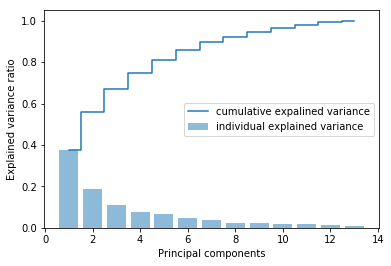

In [14]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

individual explained variance が主成分それぞれの分散説明率で、cumulative explained varianceの方は主成分を分散説明率の大きい順に取っていった場合に、それらの分散説明率の累積になっています。つまり、縦軸が元の情報の何%を表わせているかを表します。

今回の2つの主成分では、元の情報の60%弱を表していることがわかります。なので、主成分の個数を3~6個に変えてみて、精度の違いをみてみましょう。

# まとめ

- feature extraction: 既存の特徴量から新たな特徴量を作る
- PCA: feature extractionの一手法
- 使うとき
 - ロジスティック回帰などの、分類や回帰の学習の前に
 - varianceの高い(over-fittingしやすい)モデルのとき
  - 特徴量が多いとき
- 効果: over-fittingを防ぐ
- PCAの前に標準化
- 主成分の個数:計算効率と精度のバランスで決める
- 分散説明率 explained variance ratio: ある主成分が元の特徴量の何%を表しているか

In [28]:
#x_mx = [-3,-2,-1,0,1,2,3]
#y_my = [-3,-2,-1,0,1,2,3]

#x_mx = [-3,-2,-1,0,1,2,3]
#y_my = [3,2,1,0,-1,-2,-3]

x_mx = [0,1,-1,-1,1,1,0]
y_my = [0,1,1,-1,-1,0,1]

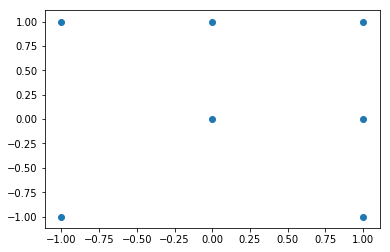

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x_mx,y_my)